### INTRODUCTION ### 

The goal of this assignment is to predict which company will file for **Bankruptcy** next year  . This is a **Binary classification problem** where we have to predict whether company goes Bankrupt(1) or Not(0) within a year of Assesment  .  



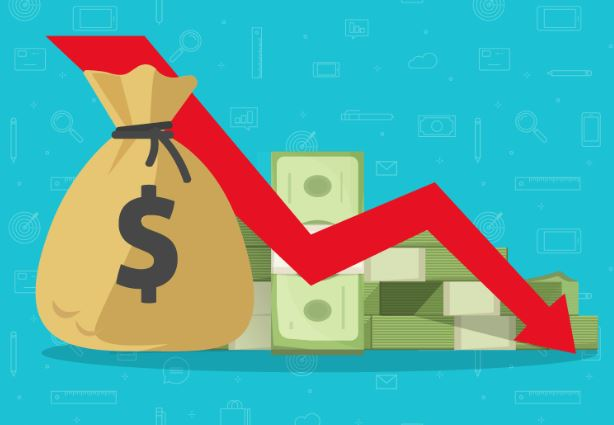

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
from IPython.display import Image

In [46]:
import sklearn
import imblearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score , confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict,RandomizedSearchCV,  KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score , precision_recall_curve, average_precision_score,roc_curve
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_excel('business_bankruptcy_prediction.xlsx',sheet_name='data')

In [109]:
df.sample(5)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¬•),Operating Profit Per Share (Yuan ¬•),Per Share Net profit before tax (Yuan ¬•),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Company type,Bankruptcy
5319,0.672598,0.695432,0.690401,0.627848,0.627848,0.999396,0.797911,0.809679,0.303542,0.781964,1.218809e-04,3.170000e+09,0.482816,0.000389,0.258326,0.234419,0.234419,0.234419,0.308500,0.353611,0.052952,0.202671,0.271146,0.022195,0.848139,0.689661,0.689661,0.217623,8.170000e+09,0.000554,0.265204,0.396734,0.018179,0.015735,0.630638,0.003641,0.084107,0.915893,0.005297,0.370194,0.005366,0.202623,0.270289,0.399458,0.157421,0.001150,0.005500,0.000113,2.072804e-04,0.034516,0.012452,0.409998,0.007727,0.868471,0.576611,0.643464,0.372860,0.015729,0.029404,0.066959,0.388558,0.277081,0.006676,0.740420,0.738739,0.328652,0.000872,0.973927,0.002913,0.021880,1.744244e-04,1.609623e-04,0.594001,2.818739e-04,0.671623,0.358086,0.740420,0.328652,0.111673,0.729062,0.484807,0.697887,0.325817,0.016136,0,0.883510,0.001483,0.624497,0.627846,0.845723,0.277420,0.026797,0.565186,1,0.045577,Limited Company,0
5262,0.503144,0.565089,0.550993,0.606552,0.606552,0.999038,0.797463,0.809374,0.303510,0.781629,1.388794e-04,1.283577e-04,0.469131,0.000655,0.147080,0.204753,0.204753,0.204753,0.229460,0.334689,0.052543,0.114079,0.185810,0.022049,0.847998,0.689352,0.689352,0.217582,7.240000e+09,0.000467,0.263819,0.397405,0.013623,0.010914,0.630712,0.005490,0.110923,0.889077,0.007388,0.370124,0.005898,0.113953,0.184654,0.403701,0.179910,0.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6818 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6818 non-null   object 
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [4]:
categorical_features=[col for col in df.columns if df[col].dtype == 'int64' ] ## denotes flag variable with only 2 values
categorical_features.append('Company type')

In [5]:
categorical_features 

[' Liability-Assets Flag', ' Net Income Flag', 'Bankruptcy', 'Company type']

**Data Overview** :

The dataset is composed of a combination of 6819 observations per each of our 96 features.
All of the features are numerical (int64 or float64) except Company type , Allocation rate per person  , Realized Sales Gross Margin .
There are just two columns with single missing value -  Net Value Per Share (C)  and Inventory/Working Capital .


### DATA EXPLORATION & VISUALISATION

### Target Variable 

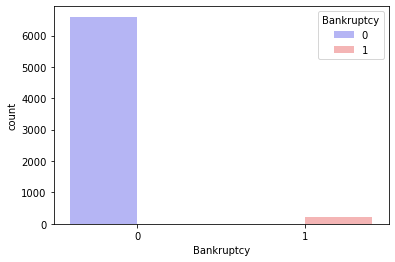

0    6599
1     220
Name: Bankruptcy, dtype: int64

In [10]:
sns.countplot(data=df, x='Bankruptcy', palette='bwr',hue='Bankruptcy')
plt.show()
df['Bankruptcy'].value_counts()


The above graph shows the data is highly imbalanced.

**Distributions:** 

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which can be implemented .

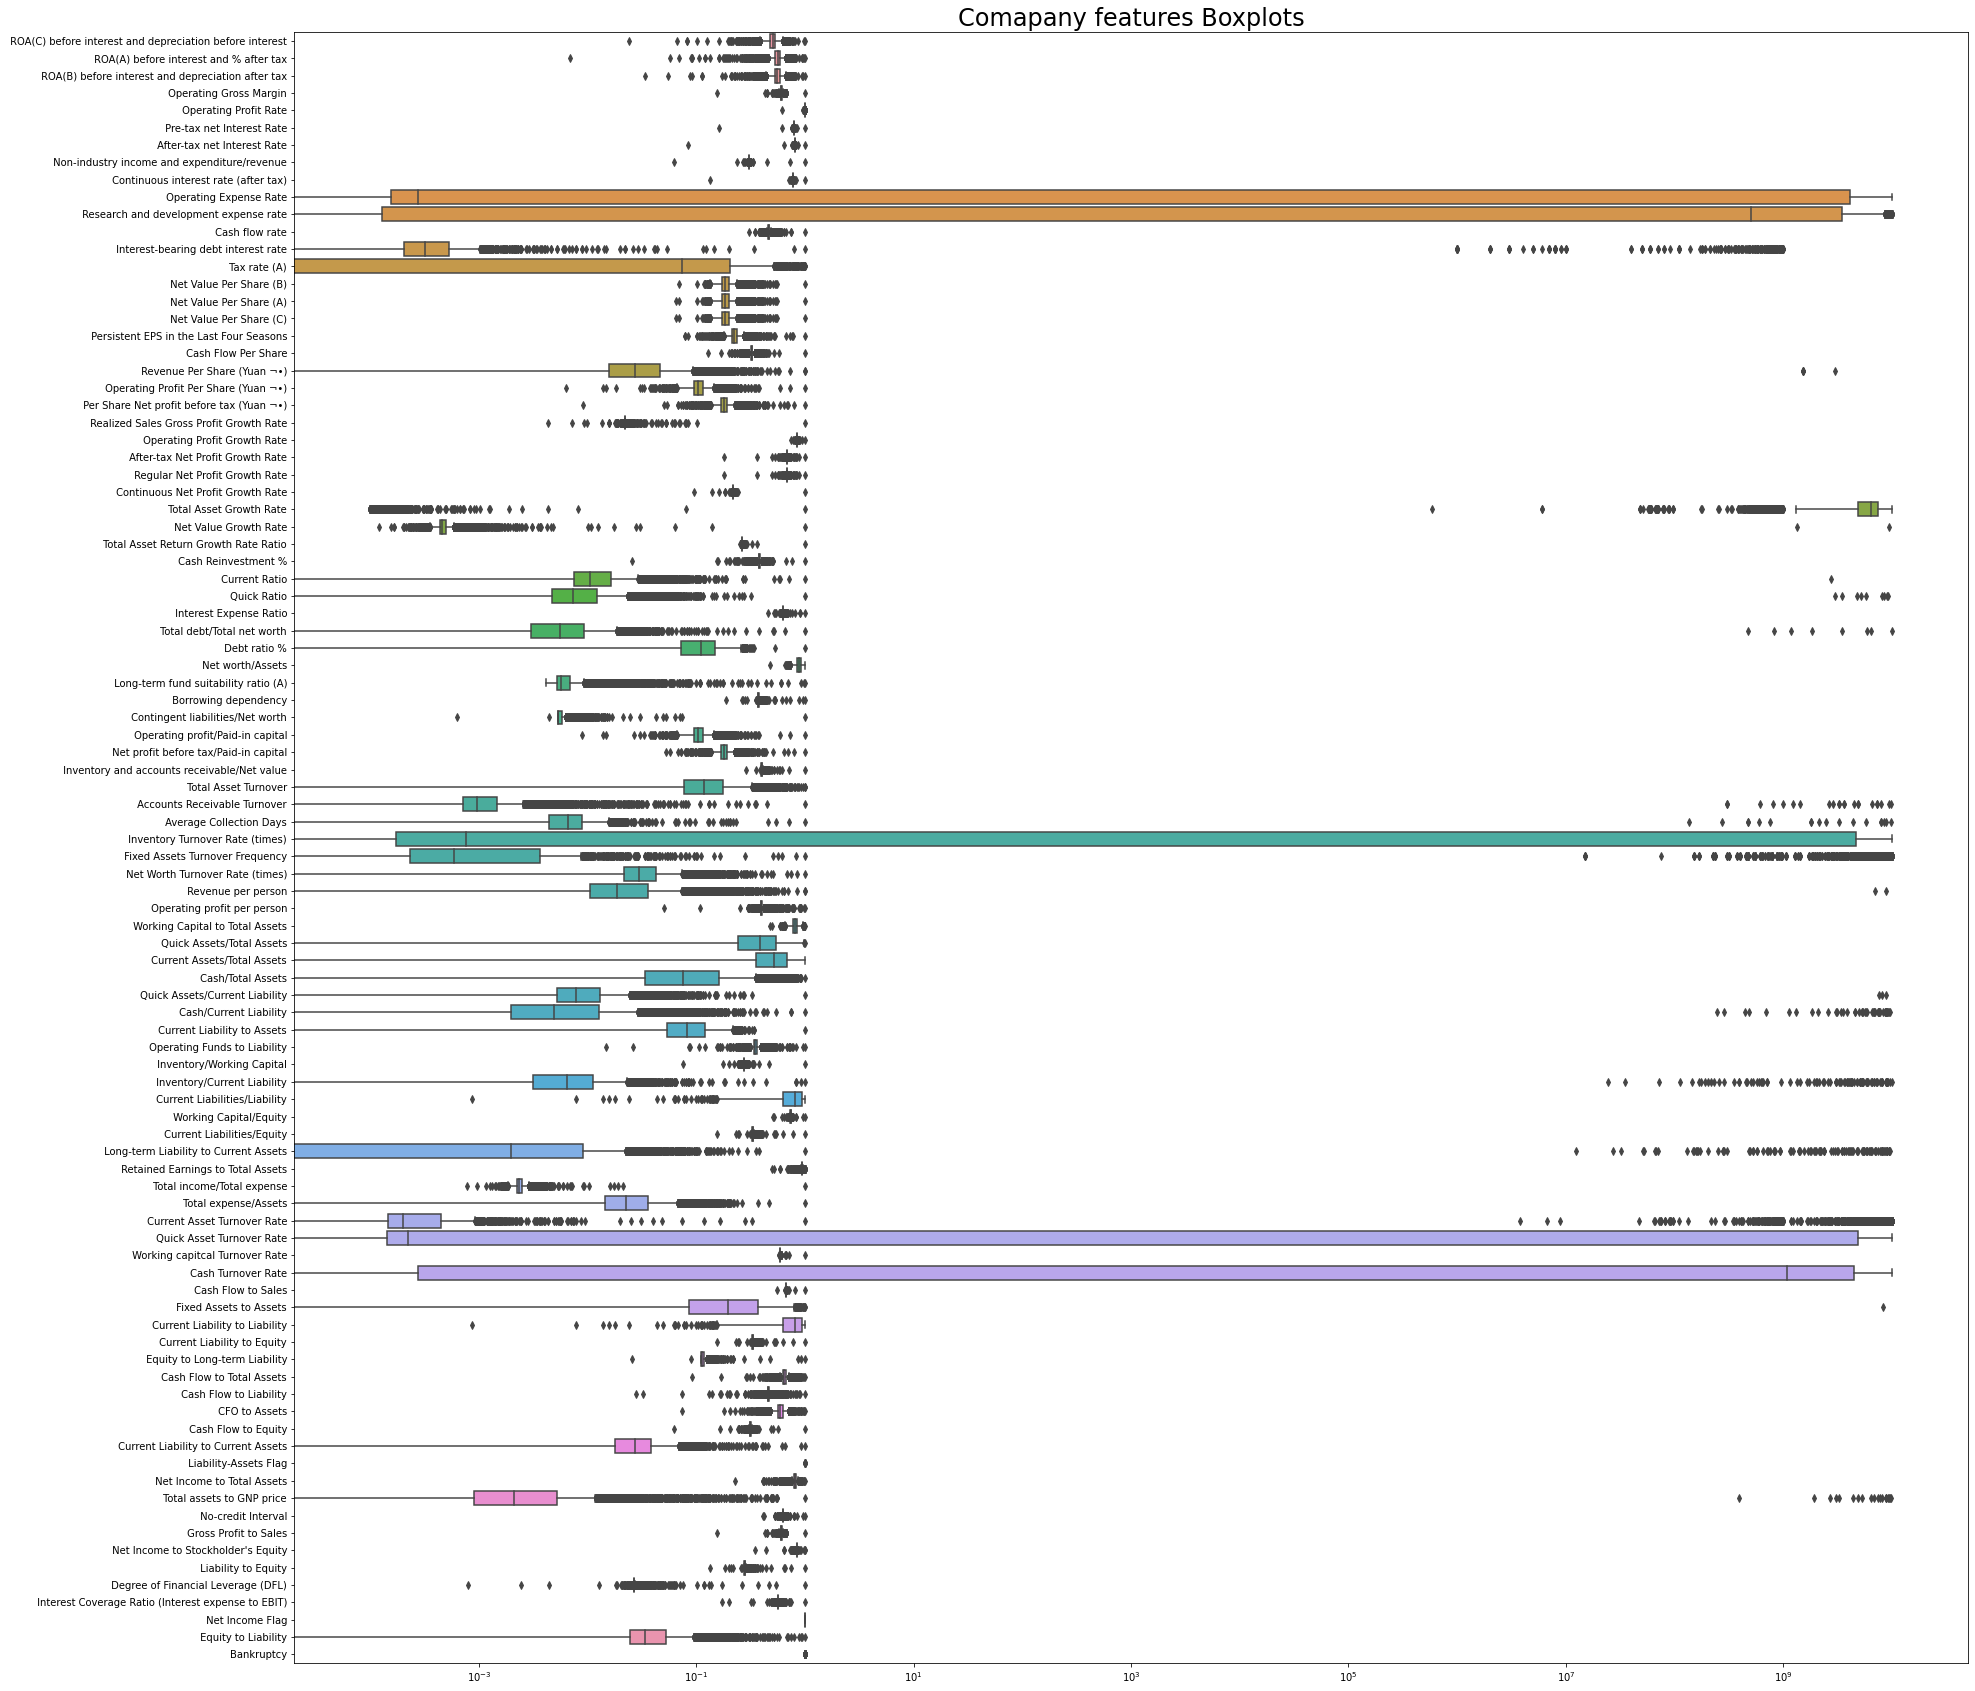

In [11]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (30,30))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Comapany features Boxplots', fontsize = 24)
ax.set(xscale="log")
plt.show()

From the boxplots ,**we can see almost all features have outliers** . However , we are not going to treat outliers as we dont know how they were generated and there can be data loss .

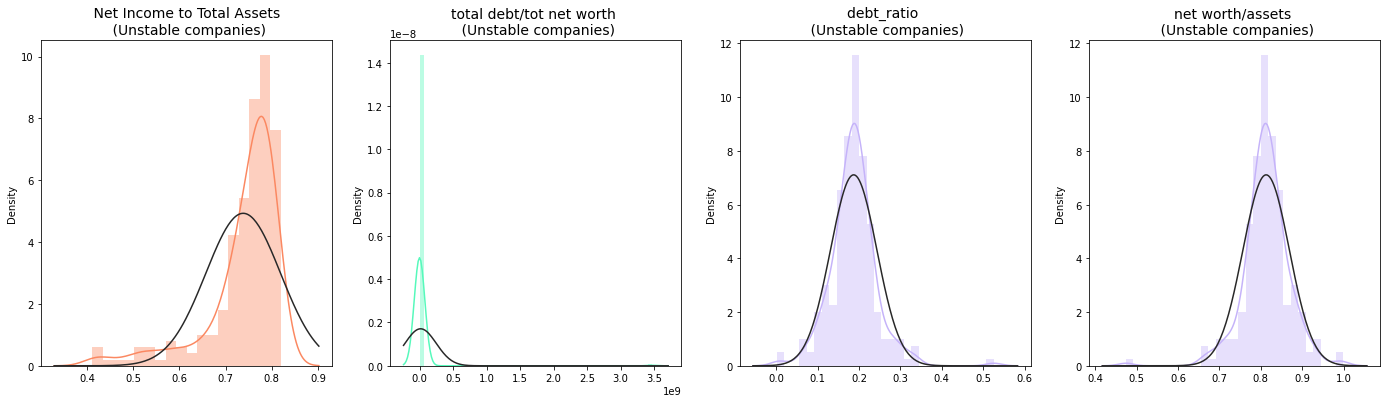

In [12]:
# Plotting the feature distributions for close to bankruptcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = df[' Net Income to Total Assets'].loc[df['Bankruptcy'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = df[' Total debt/Total net worth'].loc[df['Bankruptcy'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df[' Debt ratio %'].loc[df['Bankruptcy'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df[' Net worth/Assets'].loc[df['Bankruptcy'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

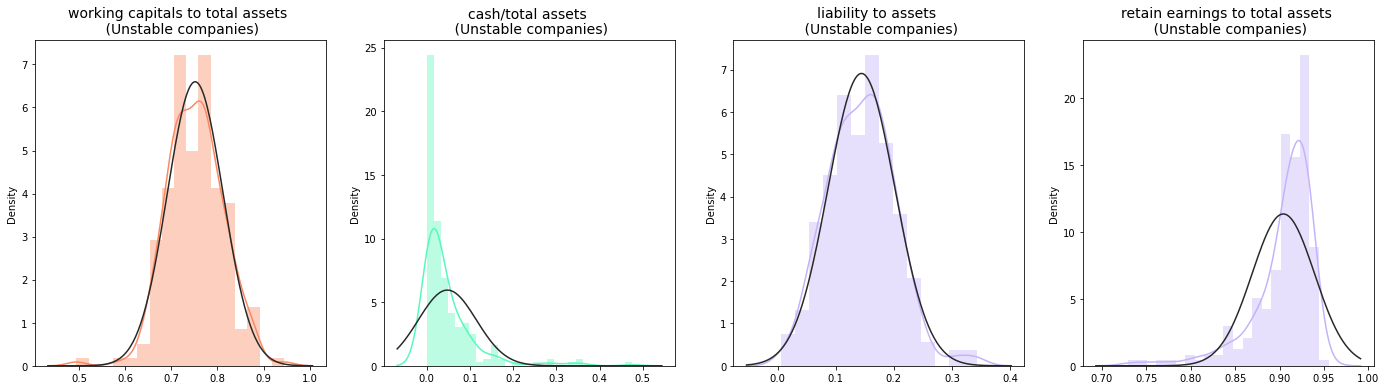

In [13]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = df[' Working Capital to Total Assets'].loc[df['Bankruptcy'] == 1].values
sns.distplot(working_cap,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = df[' Cash/Total Assets'].loc[df['Bankruptcy'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = df[' Current Liability to Assets'].loc[df['Bankruptcy'] == 1].values
sns.distplot(asset_liab,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = df[' Retained Earnings to Total Assets'].loc[df['Bankruptcy'] == 1].values
sns.distplot(operating_funds,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

Lot of features have  normal distribution but is highly influenced by the outliers. Therefore, when analysing the data, will be better to use the median as our analysis tool for central measures. Additionally, When we are building our model, we could try and take this outliers out just to see if we can get a better result

### Exploring Categorical Features 

In [54]:
categorical_features

[' Liability-Assets Flag', ' Net Income Flag', 'Bankruptcy', 'Company type']

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64
1    6819
Name:  Net Income Flag, dtype: int64
Partnership        3375
Limited Company    2761
LLP                 683
Name: Company type, dtype: int64


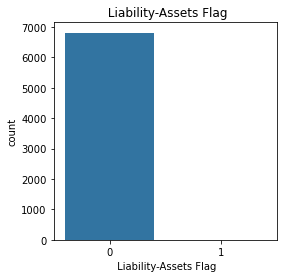

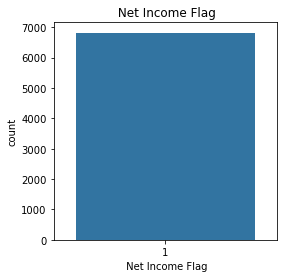

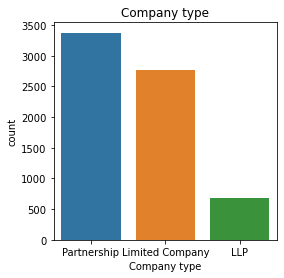

In [53]:
for i in categorical_features:
    if i!='Bankruptcy':
        print(df[i].value_counts())
        plt.figure(figsize=(4,4))
        plt.title(i)
        sns.countplot(i,data=df)
plt.show()

<AxesSubplot:xlabel=' Net Income Flag', ylabel='count'>

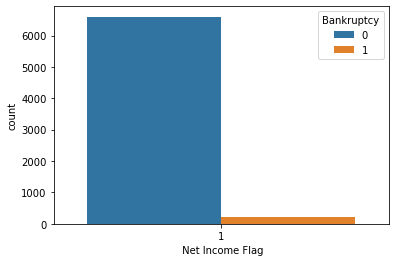

In [71]:
sns.countplot(x = ' Net Income Flag',hue = 'Bankruptcy',data = df)

<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

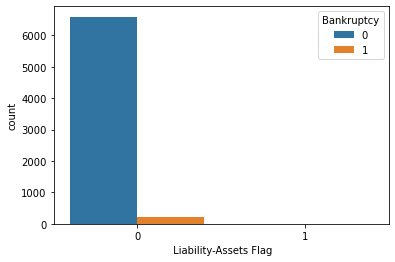

In [15]:
sns.countplot(x = ' Liability-Assets Flag',hue = 'Bankruptcy',data=df)

**Observations on Categorical Features**

 - The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities.A small portion of organizations suffers bankruptcy, although possessing more assets than their liabilities.

- The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

Although many organisations have suffered loss , they have stabilised and are not bankrupt



##  Correlation  Analysis

correlation of Numeric features with Target variable . We are considering only top 6 positive and top 6 negatively corelated features

In [6]:
numeric_features = [col for col in df.columns if col not in categorical_features]

In [6]:
positive_corr = df[numeric_features].corrwith(df["Bankruptcy"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[numeric_features].corrwith(df["Bankruptcy"]).sort_values()[:6].index.tolist()

positive_corr = df[positive_corr + ["Bankruptcy"]].copy()
negative_corr = df[negative_corr + ["Bankruptcy"]].copy()

<AxesSubplot:>

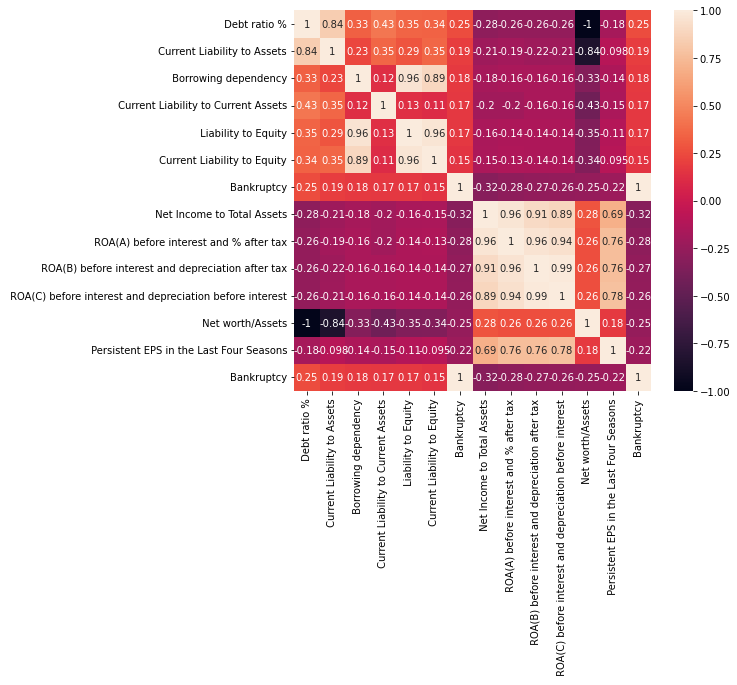

In [19]:
relation = positive_corr.columns.tolist() + negative_corr.columns.tolist()
plt.figure(figsize=(8,7))
sns.heatmap(df[relation].corr(),annot=True)

In [10]:
negative_corr.columns, positive_corr.columns

(Index([' Net Income to Total Assets',
        ' ROA(A) before interest and % after tax',
        ' ROA(B) before interest and depreciation after tax',
        ' ROA(C) before interest and depreciation before interest',
        ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons',
        'Bankruptcy'],
       dtype='object'),
 Index([' Debt ratio %', ' Current Liability to Assets',
        ' Borrowing dependency', ' Current Liability to Current Assets',
        ' Liability to Equity', ' Current Liability to Equity', 'Bankruptcy'],
       dtype='object'))

- It is observed that “Debt Ratio %, Current Liability To Assets, Borrowing Dependency,
Current Liability To Current Assets" attributes are a few of the attributes that have a high correlation with the target attribute .

- An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy. 

- An increase in the values of the attributes that have a negative correlation with the target attribute helps an organization avoid bankruptcy.

#### checking relationships between some more features  

In [20]:
df.corr().unstack().sort_values().drop_duplicates()[:10]

 Net worth/Assets                      Debt ratio %                         -1.000000
                                       Current Liability to Assets          -0.842583
 Net Income to Stockholder's Equity    Borrowing dependency                 -0.806478
 Liability to Equity                   Net Income to Stockholder's Equity   -0.791836
 Contingent liabilities/Net worth      Working Capital/Equity               -0.767778
 Current Liabilities/Equity            Net Income to Stockholder's Equity   -0.749621
                                       Working Capital/Equity               -0.692675
 Liability to Equity                   Working Capital/Equity               -0.650474
 Debt ratio %                          Equity to Liability                  -0.625879
 Current Liability to Current Assets   Working Capital to Total Assets      -0.625560
dtype: float64

<AxesSubplot:xlabel=' Debt ratio %', ylabel=' Net worth/Assets'>

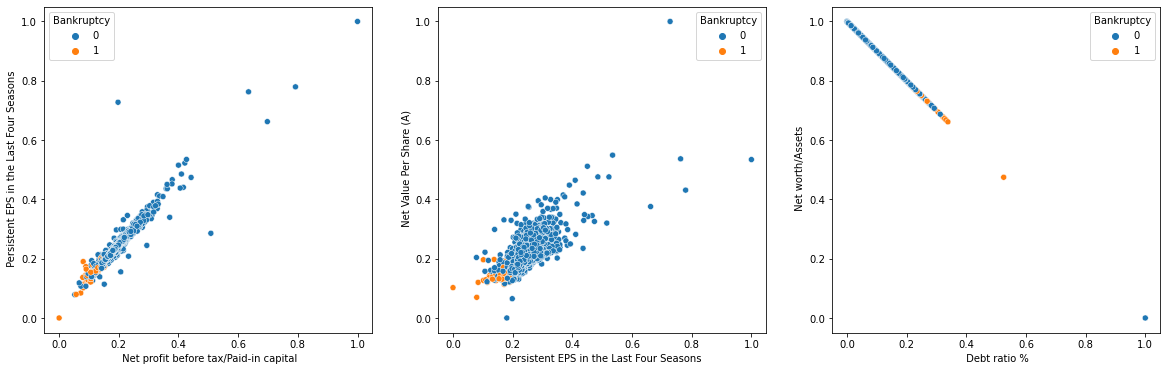

In [21]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))

sns.scatterplot(data= df, x=' Net profit before tax/Paid-in capital', y=' Persistent EPS in the Last Four Seasons', hue='Bankruptcy', ax=ax[0])
sns.scatterplot(data=df, x=' Persistent EPS in the Last Four Seasons', y=' Net Value Per Share (A)', hue='Bankruptcy', ax=ax[1])
#sns.scatterplot(data=df , x=" Net Income to Stockholder's Equity", y=' Borrowing dependency', hue='Bankruptcy', ax=ax[2])
sns.scatterplot(data= df, x=' Debt ratio %', y=' Net worth/Assets', hue='Bankruptcy', ax=ax[2])


**Observations**
-  “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.
-  companies with a low 'Net profit before tax/Paid-in capital', 'Persistent EPS in the Last Four Seasons' and 'Net Value Per Share (A)' tend to go bankrupt.
- An organization cannot guarantee not being bankrupt, although owning several assets.
- The organizations in the dataset are running into losses for the past several years as their net income poses to be negative.

 ##### median Analysis : As we saw there were lot of outliers , we can do some analysis of numeric features with basis of their median .

,Bankruptcy,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¬•),Operating Profit Per Share (Yuan ¬•),Per Share Net profit before tax (Yuan ¬•),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0.504314,0.561219,0.553563,0.606235,0.999025,0.797468,0.809379,0.303527,0.781639,0.000276,543000000.0,0.465305,0.000317,0.081587,0.185074,0.185074,0.185074,0.225111,0.322664,0.027618,0.104633,0.180236,0.022103,0.848045,0.689442,0.689442,0.217598,6.440000e+09,0.000463,0.264057,0.380621,0.010771,0.007579,0.630703,0.005377,0.109381,0.890619,0.005683,0.372474,0.005366,0.104556,0.179021,0.400053,0.119940,0.000970,0.006570,7.335294e-04,0.000583,0.029516,0.018539,0.396079,0.811822,0.388945,0.516664,0.077684,0.008084,0.005070,0.081072,0.349002,0.277179,0.006576,0.807284,0.736072,0.329596,0.001863,0.938058,0.002343,0.022539,0.000198,0.000222,0.593964,1.060000e+09,0.671574,0.194586,0.807284,0.329596,0.112228,0.645618,0.459830,0.594324,0.315010,0.027133,0.0,0.811492,0.002063,0.623887,0.606233,0.841232,0.278671,0.026810,0.565259,1.0,0.034486
1,1,0.441330,0.490215,0.488517,0.598802,0.998899,0.797156,0.809092,0.303347,0.781347,0.000335,154500000.0,0.461268,0.000499,0.000000,0.158021,0.158021,0.158021,0.195944,0.317164,0.018913,0.090343,0.155306,0.022061,0.847986,0.689154,0.689176,0.217569,5.420000e+09,0.000396,0.263724,0.375685,0.006029,0.002751,0.630283,0.015723,0.187426,0.812574,0.005160,0.382655,0.005366,0.090360,0.154012,0.404001,0.083958,0.000945,0.006757,5.160000e+07,0.001225,0.031129,0.020299,0.388158,0.752867,0.271679,0.436374,0.023755,0.003494,0.001266,0.145603,0

IndexError: index 24 is out of bounds for axis 0 with size 24

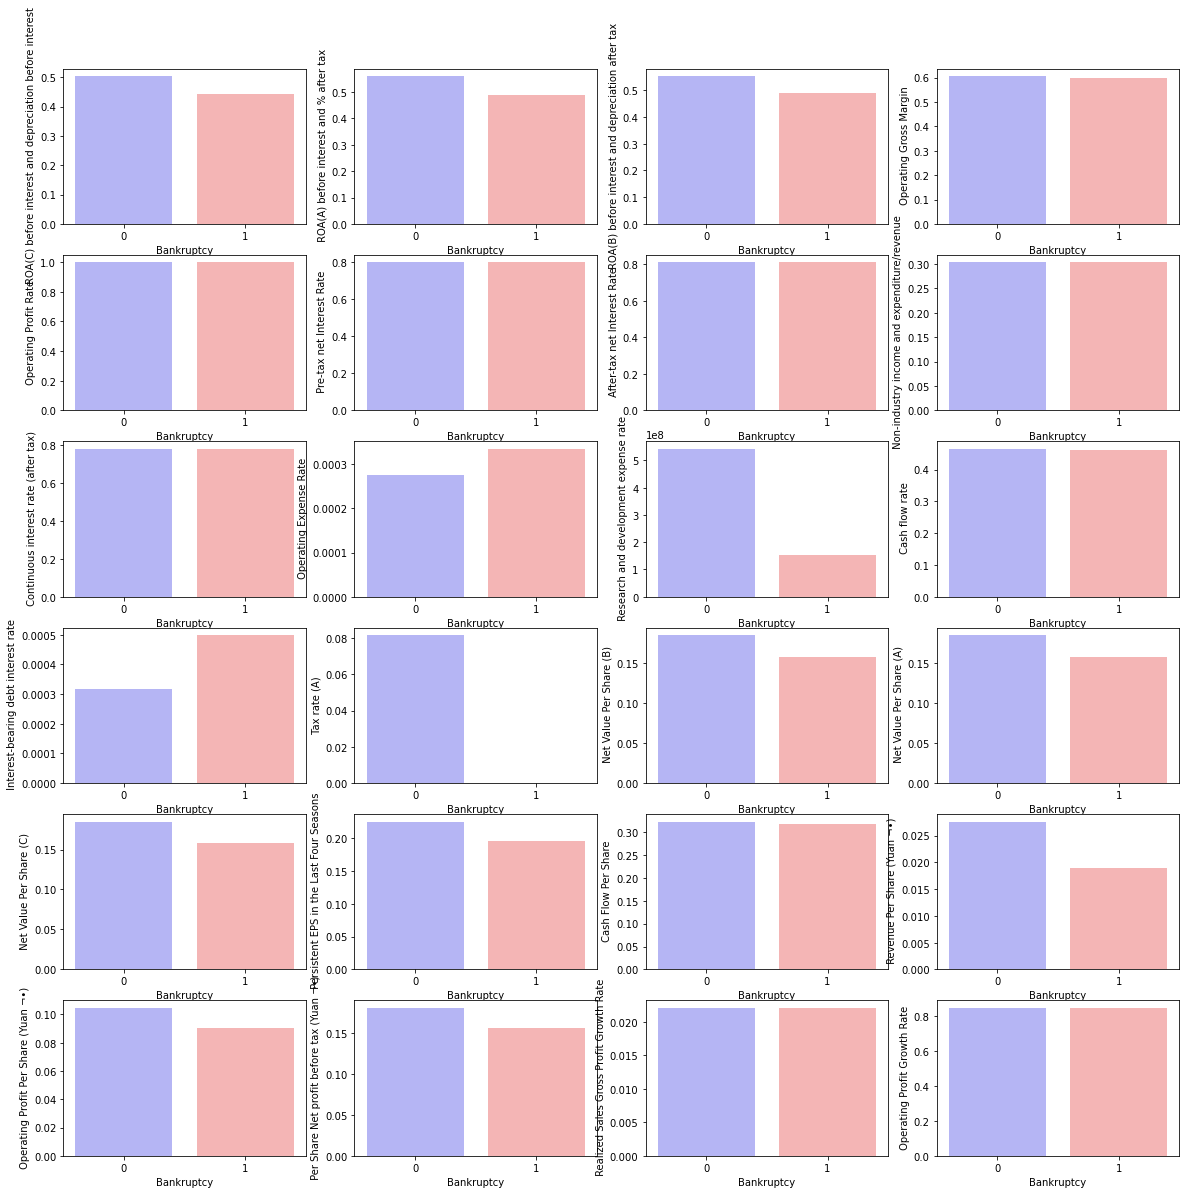

In [130]:
central = df.groupby('Bankruptcy').median().reset_index()
display(central)
features = list(central.keys()[1:])

fig, ax = plt.subplots(6,4 , figsize=(20,20))

ax = ax.ravel()
position = 0

for i in features:
    sns.barplot(data=central, x='Bankruptcy', y=i, ax=ax[position], palette='bwr')
    position += 1
    
plt.show()


**Data Analysis Conclusions

Companies with:

- high "Interest-bearing debt interest rate" tend to go bankrupt (≈ 0.000499)
- high "Total debt/Total net worth" tend to go bankrupt (≈ 0.015723)
- low "Cash/Total Assets" tend to go bankrupt (≈ 0.023755)
- low "Equity to Liability" tend to go bankrupt (≈ 0.018662)


 ## FEATURE ENGINEERING

In [7]:
Y= df['Bankruptcy']


In [ ]:
## handling categorical data

In [8]:
df['Company type'].unique()

array(['Partnership', 'Limited Company', 'LLP'], dtype=object)

In [9]:
ohe=pd.get_dummies(df['Company type'])

As ' net income  flag '  had a single value throughout , let's drop it. it does not add any variance to the model , we can drop it

In [11]:
X= df.drop([' Net Income Flag',"Bankruptcy",'Company type'], axis=1)

In [20]:
X.shape,Y.shape

((6819, 94), (6819,))

In [ ]:
## handling missing values

In [17]:
x.fillna(0,inplace=True)

In [19]:
x=pd.concat([X, ohe], axis=1)

In [24]:
x[' Realized Sales Gross Margin']=pd.to_numeric(x[' Realized Sales Gross Margin'], errors='coerce')
x[' Allocation rate per person']= pd.to_numeric(x[' Allocation rate per person'], errors='coerce')


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 97)
y_train shape: (5455,)
X_test shape: (1364, 97)
y_test shape: (1364,)


## Feature Selection

#### A) Intrinsic Feature Selection /Embedded method

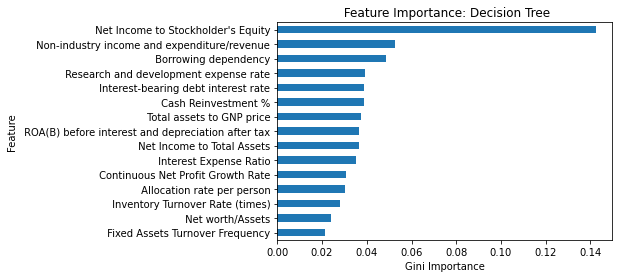

In [22]:
dc= DecisionTreeClassifier()
dc.fit(X_train , y_train)
importances = dc.feature_importances_

feat_imp = pd.Series(importances, index=X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title(" Feature Importance: Decision Tree");

 we can see some features are more important . Instead of using all columns we can try to restrict few columns and use it for model training

#### B) Filter Method : Variance Threshold

In [26]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.25)
vt.fit(x)
vt.get_support()
high_var_cols = x.columns[vt.get_support()]
low_var_cols = x.columns[~vt.get_support()]

print("Remaining cols shape :",high_var_cols)

print("Removed cols shape:",len(low_var_cols))
print("Remaining cols shape :",len(high_var_cols))

Remaining cols shape : Index([' Operating Expense Rate', ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¬•)',
       ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio',
       ' Quick Ratio', ' Total debt/Total net worth',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Revenue per person', ' Allocation rate per person',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets',
       ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate',
       ' Cash Turnover Rate', ' Fixed Assets to Assets',
       ' Total assets to GNP price'],
      dtype='object')
Removed cols shape: 73
Remaining cols shape : 24


In [30]:
imp_features=list(pd.DataFrame(feat_imp.tail(10)).index)

In [33]:
high_var_cols

Index([' Operating Expense Rate', ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¬•)',
       ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio',
       ' Quick Ratio', ' Total debt/Total net worth',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Revenue per person', ' Allocation rate per person',
       ' Quick Assets/Current Liability', ' Cash/Current Liability',
       ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets',
       ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate',
       ' Cash Turnover Rate', ' Fixed Assets to Assets',
       ' Total assets to GNP price'],
      dtype='object')

In [34]:
feat=list(high_var_cols) + imp_features

In [35]:
len(feat)

34

In [36]:
X_red=x[x.columns.intersection(feat)]

In [38]:
X_red.fillna(0,inplace=True)

#### we can build our model on   34 features that is reduced from 96 features 

### Handling Imbalanced class

 A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded. A better approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library. I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, the extreme gradient-boosted (XGBoost) algorithm used below slightly outperforms random-forest. Finally, XGBoost, like several other ML algorithms, allows for weighting the positive class more compared to the negative class --- a setting that also allows to account for the skew in the data.

####  Applying SMOTE Synthetic Minority Over-sampling Technique. 
Unlike Random OverSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".


Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.



In [39]:
sm = SMOTE(random_state=42)
X_smote_red,y_smote_red = sm.fit_resample(X_red,Y)

### MODELLING

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_red,y_smote_red,test_size=0.3, random_state=42)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9238, 31), (3960, 31), (9238,), (3960,))

#### cross validation and Hyper parameter Tuning

In [42]:
models = {
   
    'xgboost':{'model':xgb.XGBClassifier(),'params': {'max_depth':[4,6,8] , 'n_estimators' : [50,80,100,250]}},
    'random_forest': {'model': RandomForestClassifier(),'params': {'n_estimators': [1,5]}},
    'logistic_regression' : {'model': LogisticRegression(solver='liblinear',multi_class='auto'),'params': {'C': [1,5]}},
    'naive_bayes_gaussian': {'model': GaussianNB(),'params': {}},
    'decision_tree': {'model': DecisionTreeClassifier(),'params': {'criterion': ['gini','entropy']}},
    'Support vector machine': {'model':SVC(),'params': {'C': [0.1,1, 10, 100]}}
}

In [43]:
from sklearn.model_selection import GridSearchCV 
scores = []

for model_name, mp in models.items():
    clf =  GridSearchCV(mp['model'],mp['params'] ,cv= 2, return_train_score=False , scoring='accuracy')
    clf.fit(X_smote_red, y_smote_red)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])

[19:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [44]:
df_model

,model,best_score,best_params
0,xgboost,0.990916,"{'max_depth': 6, 'n_estimators': 250}"
1,random_forest,0.978812,{'n_estimators': 5}
2,logistic_regression,0.602104,{'C': 5}
3,naive_bayes_gaussian,0.704976,{}
4,decision_tree,0.921346,{'criterion': 'entropy'}
5,Support vector machine,0.934103,{'C': 100}


In [102]:
## We find XGBOOST performs best . BUT ACCURACY IS NOT THE RIGHT METRIC!!!!

### PREDICTION ON TEST SET AND MODEL EVALUATION

[19:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


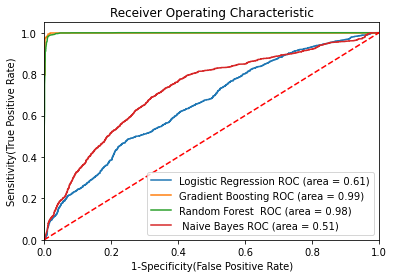

In [47]:
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': xgb.XGBClassifier(),
},
{    'label': 'Random Forest ',
    'model':RandomForestClassifier()
},
 {   'label': ' Naive Bayes'  ,
  'model':GaussianNB() }
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

**The XGboost has best area under the curve ~0.99 **

[19:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

    Bankrupt       1.00      0.97      0.99      2005
Not Bankrupt       0.97      1.00      0.99      1955

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



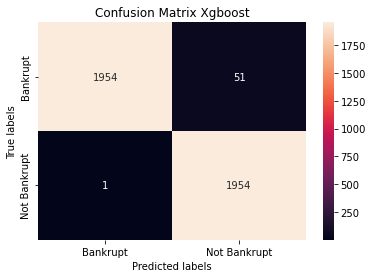

In [48]:
labels = ['Bankrupt', 'Not Bankrupt']

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
ypred_xgb = xgb_model.predict(X_test)
conf_mx1 = confusion_matrix(y_test,ypred_xgb)
ax=plt.subplot()
sns.heatmap(conf_mx1.astype(int), annot=True,fmt='g', ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Xgboost')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

print(classification_report(y_test,ypred_xgb,target_names=labels))

              precision    recall  f1-score   support

    Bankrupt       0.60      0.72      0.65      2005
Not Bankrupt       0.63      0.50      0.56      1955

    accuracy                           0.61      3960
   macro avg       0.61      0.61      0.60      3960
weighted avg       0.61      0.61      0.61      3960



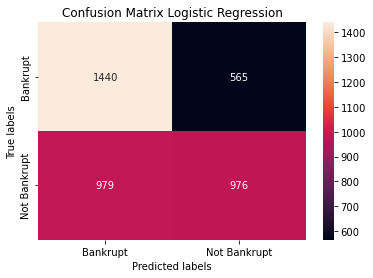

In [50]:
lr_sm= LogisticRegression(C=1,max_iter=1000).fit(X_train,y_train)
lr_pred=lr_sm.predict(X_test)
ax=plt.subplot()
conf_mx0 = confusion_matrix(y_test,lr_pred)
sns.heatmap(conf_mx0.astype(int), annot=True,fmt='g', ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

print(classification_report(y_test,lr_pred, target_names=labels))
conf_mx0 = confusion_matrix(y_test,lr_pred)

              precision    recall  f1-score   support

    Bankrupt       0.99      0.97      0.98      2005
Not Bankrupt       0.97      0.99      0.98      1955

    accuracy                           0.98      3960
   macro avg       0.98      0.98      0.98      3960
weighted avg       0.98      0.98      0.98      3960



[Text(0, 0.5, 'Bankrupt'), Text(0, 1.5, 'Not Bankrupt')]

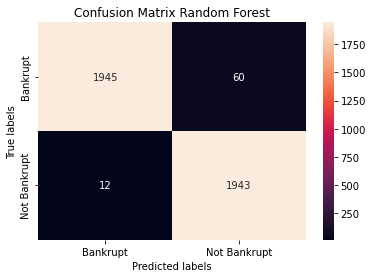

In [51]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print(classification_report(y_test,rf_pred, target_names=labels))
conf_mx0 = confusion_matrix(y_test,rf_pred)
ax=plt.subplot()
sns.heatmap(conf_mx0.astype(int), annot=True,fmt='g', ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forest')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

              precision    recall  f1-score   support

Not Bankrupt       0.86      0.76      0.81      2005
    Bankrupt       0.78      0.87      0.82      1955

    accuracy                           0.82      3960
   macro avg       0.82      0.82      0.82      3960
weighted avg       0.82      0.82      0.82      3960



[Text(0, 0.5, 'Not Bankrupt'), Text(0, 1.5, 'Bankrupt')]

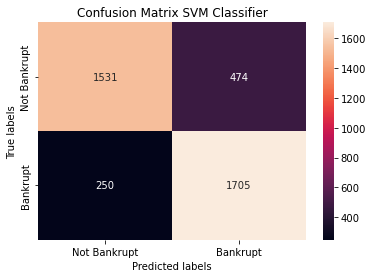

In [98]:
svm=SVC().fit(X_train,y_train)
svm_pred=svm.predict(X_test)
print(classification_report(y_test,svm_pred, target_names=labels))

conf_mx0 = confusion_matrix(y_test,svm_pred)
ax=plt.subplot()
sns.heatmap(conf_mx0.astype(int), annot=True,fmt='g', ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SVM Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


###### Confusion Matrix:
**Positive/Negative:** Type of Class (label) ["Not Bankrupt", " Bankrupt Yes"]
**True/False:** Correctly or Incorrectly classified by the model.<br><br>
**True Negatives (Top-Left Square):** This is the number of **correctly** classifications of the "No" (No Bankrupt) class. <br><br>
**False Negatives (Top-Left Square):** This is the number of **incorrectly** classifications of the "No"(No Bankrupt) class. <br><br>
**False Positives (Top Right Square):** This is the number of **incorrectly** classifications of the "Yes" (Bankruptcy) Detected) class <br><br>
**True Positives (Bottom-Right Square):** This is the number of **correctly** classifications of the "Yes" (Bankruptcy) class.

**Choosing the best evaluation metric:**
As seen from the confusion matrix ,the algorithm that recognizes more observations of the minority class is xgboost classifier, even though this comes with a great cost in term of presence of false positives. Despite the presence of the errors,  it could be a useful model. Hence , we can choose 'RECALL ' as a preferred metric here to minimise any FALSE NEGATIVE ie. missing to classify a bankrupt company .


- if the Business objective is to minimise both False positive and False negative , then F1 score can be used as (trafe off between precision recall)

In [104]:
import pickle
pickle.dump(xgb_model, open('xgb.pkl', 'wb'))

### CONCLUSION/ KEY FINDINGS 

-  “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.
- An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy.
-  companies with a low 'Net profit before tax/Paid-in capital', 'Persistent EPS in the Last Four Seasons' and 'Net Value Per Share (A)' tend to go bankrupt.
- An organization cannot guarantee not being bankrupt, although owning several assets.
- Some important features for  predictting Bankruptcy were : ' Net profit before tax/Paid-in capital', ' Persistent EPS in the Last Four Seasons', " Interest-bearing debt interest rate", " Total debt/Total net worth", " Fixed Assets Turnover Frequency", " Cash/Total Assets", " Equity to Liability". 

- Companies with:

- high "Interest-bearing debt interest rate" tend to go bankrupt (≈ 0.000499)
- high "Total debt/Total net worth" tend to go bankrupt (≈ 0.015723)
- high "Fixed Assets Turnover Frequency" tend to go bankrupt (≈ 0.001225)
- low "Cash/Total Assets" tend to go bankrupt (≈ 0.023755)
- low "Equity to Liability" tend to go bankrupt (≈ 0.018662)


## SUMMARY

- We trained 4 models and chose XGBOOST as the best classifier with 97% recall  for bankruptcy with 34 features using some feature selection Techniques. .
- Data was highly imbalanced , so we used SMOTE OVERSAMPLING technique .
- Recall or F1 score can be a suitable metric . We want to detect as many as bankrupt companies as possible , even though it can increase the cost of incorrectly identifying few stable companies as Bankrupt . This company is bankrupted, but we predicted that this company is safe" -> We don't want this to happen.